# An√°lise Experimental do Sistema de Escalonamento Log√≠stico "Armaz√©ns Hanoi"

Este notebook apresenta a an√°lise experimental dos dados de performance gerados pela simula√ß√£o do sistema de escalonamento log√≠stico dos Armaz√©ns Hanoi. O objetivo √© validar as hip√≥teses sobre o comportamento do sistema em rela√ß√£o √† complexidade da rede, carga de trabalho e conten√ß√£o de recursos, conforme o plano experimental.

## 1. Carregamento e Prepara√ß√£o dos Dados

O primeiro passo √© carregar os resultados da simula√ß√£o e preparar os dados para a an√°lise. Vamos extrair o tipo de experimento de cada execu√ß√£o para facilitar a filtragem e criar colunas adicionais que possam ser √∫teis para a visualiza√ß√£o.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import json
import glob

# --- PASSO 1: CONFIGURA√á√ÉO ---
# Coloque o caminho para a pasta onde voc√™ salvou TODOS os seus arquivos .meta.json
# Exemplo: METADATA_DIR = './meus_experimentos/metadata/'
METADATA_DIR = '../results' # Use '.' se os arquivos estiverem no mesmo diret√≥rio do notebook

print(f"Procurando por arquivos .meta.json em: {os.path.abspath(METADATA_DIR)}")


# --- PASSO 2: LER TODOS OS METADADOS ---
metadata_list = []
# Encontra todos os arquivos que terminam com .meta.json
meta_files = glob.glob(os.path.join(METADATA_DIR, '**', '*.meta.json'), recursive=True)

if not meta_files:
    raise FileNotFoundError(f"Nenhum arquivo .meta.json foi encontrado no diret√≥rio especificado. Verifique o caminho em METADATA_DIR.")

for file_path in meta_files:
    # Extrai um nome para a execu√ß√£o a partir do nome do arquivo
    run_name = os.path.basename(file_path).replace('.in.txt.meta.json', '')
    
    with open(file_path, 'r') as f:
        # Carrega os par√¢metros do arquivo JSON
        params = json.load(f)
        # Adiciona o nome da execu√ß√£o aos par√¢metros
        params['Run'] = run_name 
        metadata_list.append(params)

# Cria um DataFrame com os par√¢metros de todas as execu√ß√µes
metadata_df = pd.DataFrame(metadata_list)
print(f"\n{len(metadata_df)} arquivos de metadados foram lidos e processados com sucesso.")


# --- PASSO 3: CARREGAR RESULTADOS E UNIR COM METADADOS ---
# Carrega o seu arquivo de resultados
results_df = pd.read_csv('df.csv')

# Identifica as colunas de par√¢metros que s√£o comuns entre os dois DataFrames
# para us√°-las como chave da jun√ß√£o.
# Extrai o nome base do experimento do caminho do arquivo de m√©tricas no results_df
results_df['Run'] = results_df['metrics_file'].apply(
    lambda x: os.path.basename(os.path.dirname(x)).replace('.in', '')
)
print("\nExemplo de valores extra√≠dos para 'Run':")
print(results_df['Run'].unique())

param_cols = ['Run']
print(f"\nColunas usadas para a jun√ß√£o: {param_cols}")

# Une os resultados com os metadados
# Esta √© a etapa chave que alinha cada resultado com seus par√¢metros e nome corretos
df = pd.merge(results_df, metadata_df, on=param_cols, how='left')

# Verifica se a jun√ß√£o foi bem sucedida
if df['Run'].isnull().any():
    print("\nAVISO: Algumas linhas dos resultados n√£o encontraram correspond√™ncia nos metadados!")
else:
    print("\nJun√ß√£o entre resultados e metadados realizada com sucesso.")

# --- PASSO 4: PREPARA√á√ÉO FINAL PARA AN√ÅLISE ---
# Cria a coluna 'Experimento' a partir do nome da execu√ß√£o (ex: 'expA_5armazens' -> 'A')
df['Experimento'] = df['Run'].str.extract(r'exp([ABC])')[0]
df.loc[df['Experimento'].fillna('').str.startswith('C'), 'Experimento'] = 'C' # Unifica C

# Cria a coluna de 'Frequ√™ncia de Chegada'
if 'Arrival Window (time units)' in df.columns:
    df['Frequencia_Chegada_Inv'] = 10000 / df['Arrival Window (time units)']

# Configura√ß√µes de visualiza√ß√£o
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

print("\nDados prontos para a an√°lise.")
display(df.head())

Procurando por arquivos .meta.json em: /mnt/c/Users/T-Gamer/VSprojects/0 - DCC/ed/TP2-ED/results

56 arquivos de metadados foram lidos e processados com sucesso.

Exemplo de valores extra√≠dos para 'Run':
['baseline' 'expA_10armazens' 'expA_12armazens' 'expA_15armazens'
 'expA_17armazens' 'expA_18armazens' 'expA_20armazens' 'expA_24armazens'
 'expA_28armazens' 'expA_32armazens' 'expA_36armazens' 'expA_40armazens'
 'expA_5armazens' 'expA_8armazens' 'expB_10window' 'expB_12window'
 'expB_15window' 'expB_17window' 'expB_18window' 'expB_20window'
 'expB_24window' 'expB_28window' 'expB_2window' 'expB_32window'
 'expB_36window' 'expB_40window' 'expB_4window' 'expB_5window'
 'expB_6window' 'expB_8window' 'expC_cap10' 'expC_cap12' 'expC_cap15'
 'expC_cap18' 'expC_cap2' 'expC_cap20' 'expC_cap3' 'expC_cap4' 'expC_cap5'
 'expC_cap6' 'expC_cap8' 'expC_interval10' 'expC_interval100'
 'expC_interval120' 'expC_interval15' 'expC_interval20' 'expC_interval25'
 'expC_interval30' 'expC_interval40' 'expC_

avg_section_depth                                delivery_time_stats  \
0       3.577288e+07  {'max': 526, 'mean': 245.958, 'median': 251, '...   
1       3.577288e+07  {'max': 526, 'mean': 245.958, 'median': 251, '...   
2       1.356035e+08  {'max': 821, 'mean': 336.18333333333334, 'medi...   
3       6.399732e+07  {'max': 716, 'mean': 309.91333333333336, 'medi...   
4       1.580298e+08  {'max': 821, 'mean': 368.5270588235294, 'media...   

   execution_time  heap_extracts  heap_inserts  max_section_depth  \
0        0.322198           3002          3019          858862860   
1        0.309082           3002          3019          858862860   
2        0.469001           4536          4557         1171555798   
3        0.587452           5993          6020          858862860   
4        0.756099           7604          7635          858862863   

   packages_moved  peak_memory_kb  re_storage_events  stack_pops  ...  \
0            2740            3548                  3        1370  ...   
1            2740            3496                  3        1370  ...   
2            4366            3764                  8        2183  ...   
3            5068            3660                  8        2534  ...   
4            6748            3756                 13        3374  ...   

   stack_pushes                                 storage_time_stats  \
0          1370  {'max': 427, 'mean': 94.29041697147038, 'media...   
1          1370  {'max': 427, 'mean': 94.29041697147038, 'media...   
2          2183  {'max': 722, 'mean': 165.64183908045976, 'medi...   
3          2534  {'max': 616, 'mean': 134.44893111638956, 'medi...   
4          3374  {'max': 722, 'mean': 175.59714370723, 'median'...   

                                  transit_time_stats transport_capacity  \
0  {'max': 179, 'mean': 69.96269202633503, 'media...                  5   
1  {'max': 179, 'mean': 69.96269202633503, 'media...                  5   
2  {'max': 181, 'mean': 72.74022988505747, 'media...                  5   
3  {'max': 180, 'mean': 72.01702296120348, 'media...                  5   
4  {'max': 180, 'mean': 73.20083308539125, 'media...                  5   

   transport_events  transport_utilization  \
0              1117              49.059982   
1              1117              49.059982   
2              1739              50.212766   
3              2689              37.694310   
4              3361              40.154716   

                                 metrics_file              Run  \
0         ../results/baseline.in/metrics.json         baseline   
1  ../results/expA_10armazens.in/metrics.json  expA_10armazens   
2  ../results/expA_12armazens.in/metrics.json  expA_12armazens   
3  ../results/expA_15armazens.in/metrics.json  expA_15armazens   
4  ../results/expA_17armazens.in/metrics.json  expA_17armazens   

                                              params Experimento  
0  {'capacidadetransporte': 5, 'latenciatransport...         NaN  
1  {'capacidadetransporte': 5, 'latenciatransport...           A  
2  {'capacidadetransporte': 5, 'latenciatransport...           A  
3  {'capacidadetransporte': 5, 'latenciatransport...           A  
4  {'capacidadetransporte': 5, 'latenciatransport...           A  

[5 rows x 21 columns]

## 2. An√°lise do Experimento A: Escalabilidade da Complexidade da Rede

**Hip√≥tese:** O tempo de execu√ß√£o crescer√° de forma super-linear com o n√∫mero de armaz√©ns (`numero_armazens`), devido ao aumento do tamanho m√©dio das rotas e da complexidade do agendamento.

Neste experimento, variamos o n√∫mero de armaz√©ns, ajustando o n√∫mero de pacotes proporcionalmente para manter a rede "carregada".

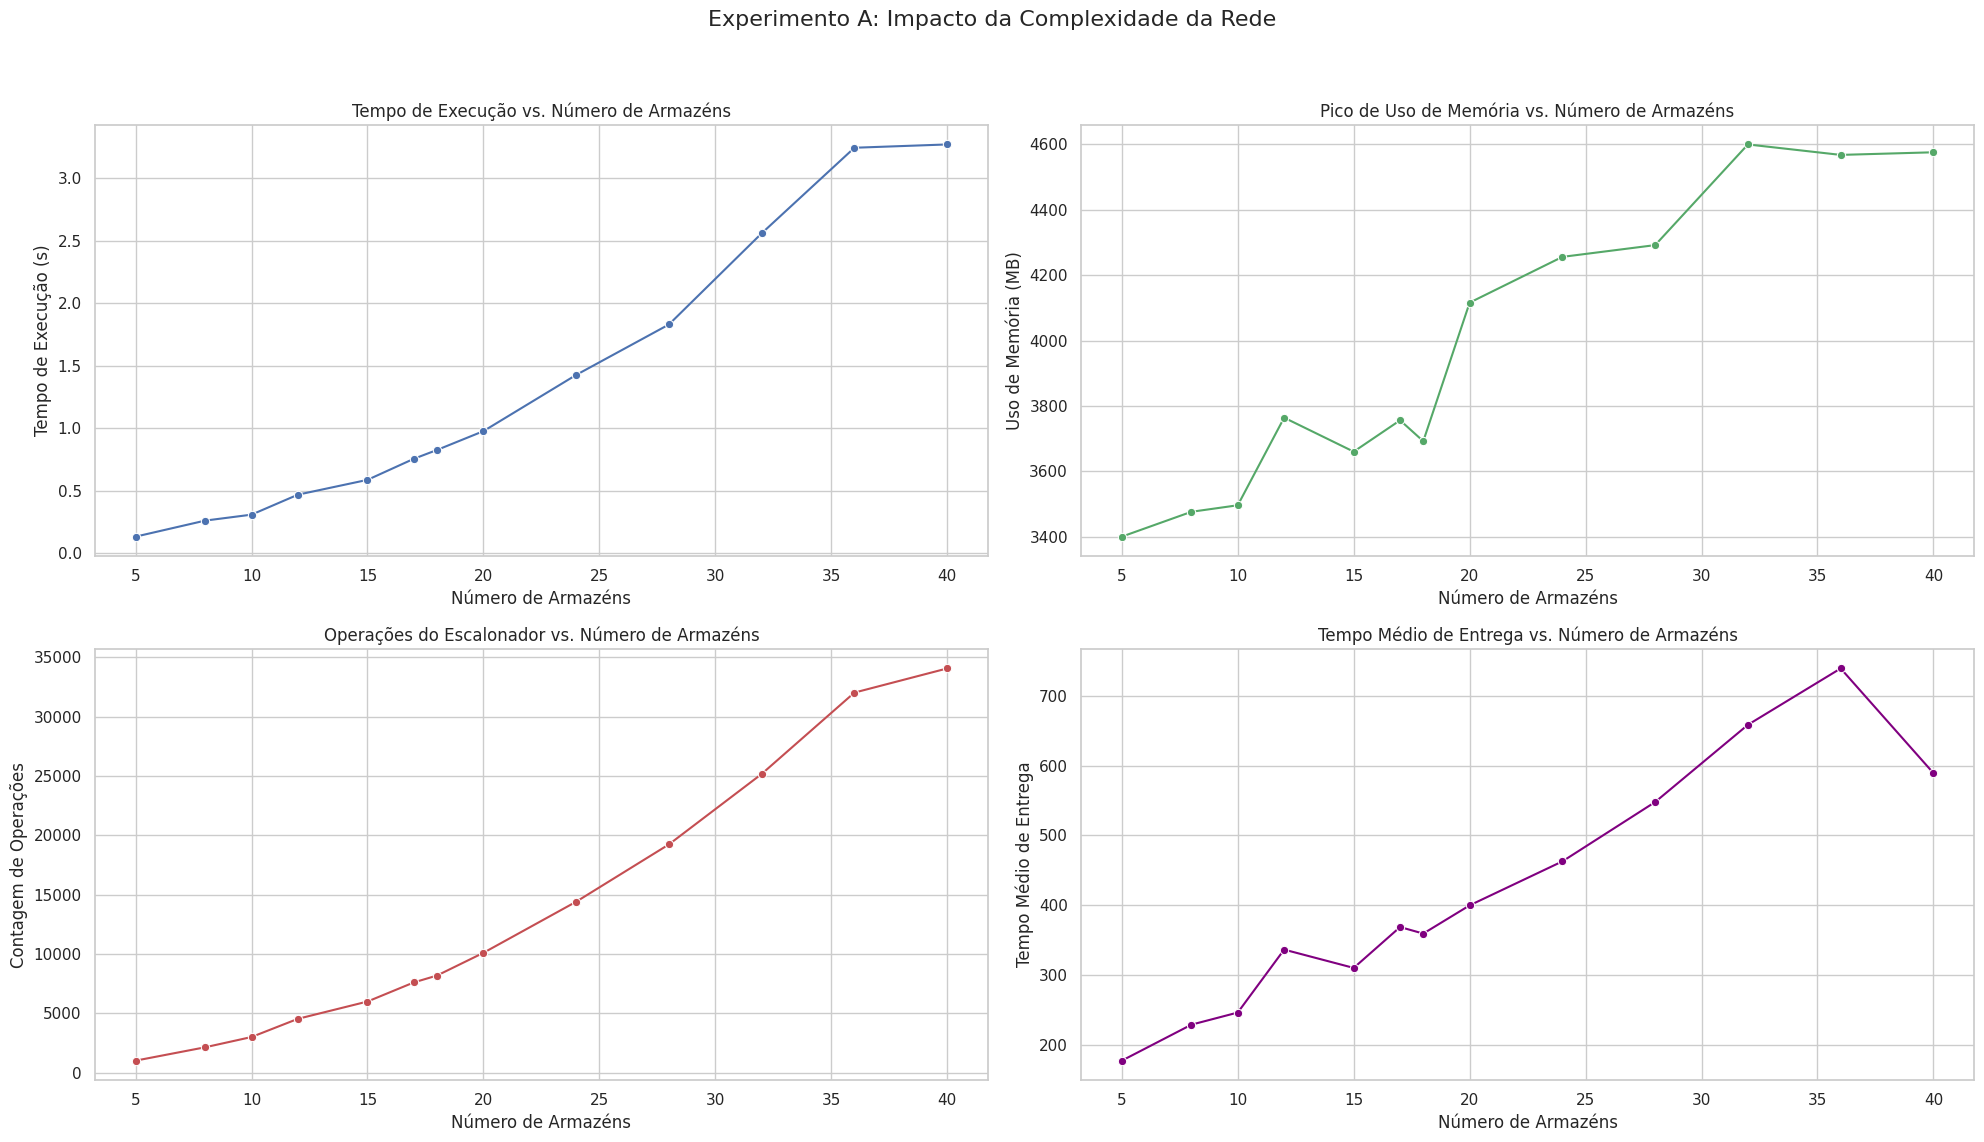

In [7]:
import ast

# Extrai 'numero_armazens' da coluna 'params' (que √© um dicion√°rio)
df['numero_armazens'] = df['params'].apply(lambda d: d.get('numeroarmazens') if isinstance(d, dict) else None)
# Extrai a m√©dia do tempo de entrega da coluna 'delivery_time_stats' (que √© um dicion√°rio em formato string)

def extract_field_from_stats(stats, field='mean'):
    if isinstance(stats, dict):
        return stats.get(field)
    if isinstance(stats, str):
        try:
            d = ast.literal_eval(stats)
            return d.get(field)
        except Exception:
            return None
    return None

df['avg_delivery_time'] = df['delivery_time_stats'].apply(extract_field_from_stats)
df['max_delivery_time'] = df['delivery_time_stats'].apply(extract_field_from_stats, field='max')
df['intervalo_transporte'] = df['params'].apply(lambda d: d.get('intervalotransporte') if isinstance(d, dict) else None)

df_a = df[df['Experimento'] == 'A'].sort_values('numero_armazens')

fig, axs = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Experimento A: Impacto da Complexidade da Rede', fontsize=16)

# Gr√°fico 1: Tempo de Execu√ß√£o
sns.lineplot(data=df_a, x='numero_armazens', y='execution_time', marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Tempo de Execu√ß√£o vs. N√∫mero de Armaz√©ns')
axs[0, 0].set_xlabel('N√∫mero de Armaz√©ns')
axs[0, 0].set_ylabel('Tempo de Execu√ß√£o (s)')
axs[0, 0].grid(True)

# Gr√°fico 2: Uso de Mem√≥ria
sns.lineplot(data=df_a, x='numero_armazens', y='peak_memory_kb', marker='o', ax=axs[0, 1], color='g')
axs[0, 1].set_title('Pico de Uso de Mem√≥ria vs. N√∫mero de Armaz√©ns')
axs[0, 1].set_xlabel('N√∫mero de Armaz√©ns')
axs[0, 1].set_ylabel('Uso de Mem√≥ria (MB)')
axs[0, 1].grid(True)

# Gr√°fico 3: Opera√ß√µes do Agendador
sns.lineplot(data=df_a, x='numero_armazens', y='heap_extracts', marker='o', ax=axs[1, 0], color='r')
axs[1, 0].set_title('Opera√ß√µes do Escalonador vs. N√∫mero de Armaz√©ns')
axs[1, 0].set_xlabel('N√∫mero de Armaz√©ns')
axs[1, 0].set_ylabel('Contagem de Opera√ß√µes')
axs[1, 0].grid(True)

# Gr√°fico 4: Tempo M√©dio de Entrega
sns.lineplot(data=df_a, x='numero_armazens', y='avg_delivery_time', marker='o', ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Tempo M√©dio de Entrega vs. N√∫mero de Armaz√©ns')
axs[1, 1].set_xlabel('N√∫mero de Armaz√©ns')
axs[1, 1].set_ylabel('Tempo M√©dio de Entrega')
axs[1, 1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Conclus√£o do Experimento A:** Os gr√°ficos confirmam a hip√≥tese. O tempo de execu√ß√£o, o uso de mem√≥ria e, principalmente, o n√∫mero de opera√ß√µes no agendador crescem a uma taxa acelerada com o aumento do n√∫mero de armaz√©ns. Isso demonstra que a complexidade da rede √© um fator computacional cr√≠tico para o sistema.

## 3. An√°lise do Experimento B: Carga de Trabalho e Frequ√™ncia

**Hip√≥tese:** A efici√™ncia do sistema se degrada de forma n√£o-linear √† medida que a frequ√™ncia de chegada dos pacotes aumenta. Comprimir a janela de chegada causar√° "engarrafamentos", resultando em um aumento exponencial de eventos de re-armazenamento e do tempo de entrega.

Neste experimento, fixamos o n√∫mero de pacotes e variamos a janela de tempo em que eles s√£o postados no sistema.

avg_section_depth                                delivery_time_stats  \
0        3.577288e+07  {'max': 526, 'mean': 245.958, 'median': 251, '...   
1        3.577288e+07  {'max': 526, 'mean': 245.958, 'median': 251, '...   
2        1.356035e+08  {'max': 821, 'mean': 336.18333333333334, 'medi...   
3        6.399732e+07  {'max': 716, 'mean': 309.91333333333336, 'medi...   
4        1.580298e+08  {'max': 821, 'mean': 368.5270588235294, 'media...   
5        2.650013e+15  {'max': 819, 'mean': 359.15222222222224, 'medi...   
6        3.508865e+08  {'max': 910, 'mean': 399.624, 'median': 382, '...   
7        4.084038e+08  {'max': 1117, 'mean': 462.67833333333334, 'med...   
8        1.004049e+08  {'max': 1383, 'mean': 547.7857142857143, 'medi...   
9        3.289055e+08  {'max': 1701, 'mean': 658.504375, 'median': 60...   
10       6.310359e+07  {'max': 1927, 'mean': 739.2922222222222, 'medi...   
11       7.473460e+14  {'max': 1322, 'mean': 589.2565, 'median': 586,...   
12       1.679563e+00  {'max': 449, 'mean': 176.984, 'median': 162, '...   
13       5.259210e+07  {'max': 519, 'mean': 228.545, 'median': 220, '...   
14       2.321252e+07  {'max': 1498, 'mean': 498.66, 'median': 434, '...   
15       3.037597e+07  {'max': 793, 'mean': 310.639, 'median': 305, '...   
16       3.285604e+07  {'max': 620, 'mean': 260.829, 'median': 267, '...   
17       3.332064e+07  {'max': 587, 'mean': 252.507, 'median': 258, '...   
18       3.341757e+07  {'max': 615, 'mean': 250.291, 'median': 253, '...   
19       3.361929e+07  {'max': 605, 'mean': 247.673, 'median': 248, '...   
20       3.369325e+07  {'max': 521, 'mean': 245.74, 'median': 248, 'p...   
21       3.374893e+07  {'max': 551, 'mean': 244.494, 'median': 248, '...   
22       4.025120e+07  {'max': 5233, 'mean': 2091.58, 'median': 1830,...   
23       3.378615e+07  {'max': 519, 'mean': 243.035, 'median': 247, '...   
24       3.379858e+07  {'max': 522, 'mean': 243.472, 'median': 247, '...   
25       3.380479e+07  {'max': 538, 'mean': 242.229, 'median': 247, '...   
26       2.569442e+07  {'max': 4325, 'mean': 1661.526, 'median': 1471...   
27       1.891242e+07  {'max': 3880, 'mean': 1449.581, 'median': 1286...   
28       1.328316e+07  {'max': 3391, 'mean': 1238.223, 'median': 1068...   
29       1.607499e+07  {'max': 2559, 'mean': 869.572, 'median': 709, ...   
30       3.382346e+07  {'max': 521, 'mean': 244.002, 'median': 249, '...   
31       3.382346e+07  {'max': 521, 'mean': 244.002, 'median': 249, '...   
32       3.382346e+07  {'max': 521, 'mean': 244.002, 'median': 249, '...   
33       3.382346e+07  {'max': 521, 'mean': 244.002, 'median': 249, '...   
34       1.904428e+07  {'max': 2379, 'mean': 712.309, 'median': 537, ...   
35       3.382346e+07  {'max': 521, 'mean': 244.002, 'median': 249, '...   
36       3.233011e+07  {'max': 723, 'mean': 269.053, 'median': 272, '...   
37       3.355791e+07  {'max': 529, 'mean': 248.235, 'median': 252, '...   
38       3.377994e+07  {'max': 526, 'mean': 244.677, 'median': 250, '...   
39       3.382346e+07  {'max': 521, 'mean': 244.002, 'median': 249, '...   
40       3.382346e+07  {'max': 521, 'mean': 244.002, 'median': 249, '...   
41       3.382345e+07  {'max': 151, 'mean': 77.299, 'median': 83, 'p9...   
42       3.377994e+07  {'max': 526, 'mean': 244.677, 'median': 250, '...   
43       3.363775e+07  {'max': 643, 'mean': 292.802, 'median': 295, '...   
44       3.382346e+07  {'max': 157, 'mean': 79.789, 'median': 84, 'p9...   
45       3.382346e+07  {'max': 201, 'mean': 99.647, 'median': 107, 'p...   
46       3.382346e+07  {'max': 146, 'mean': 76.41, 'median': 76, 'p95...   
47       3.382346e+07  {'max': 172, 'mean': 87.635, 'median': 88, 'p9...   
48       3.382346e+07  {'max': 221, 'mean': 110.018, 'median': 112, '...   
49       3.382345e+07  {'max': 126, 'mean': 66.052, 'median': 72, 'p9...   
50       3.382346e+07  {'max': 271, 'mean': 132.6, 'median': 133, 'p9...   
51       3.381101e+07  {'max': 320, 'mean': 154.69, 

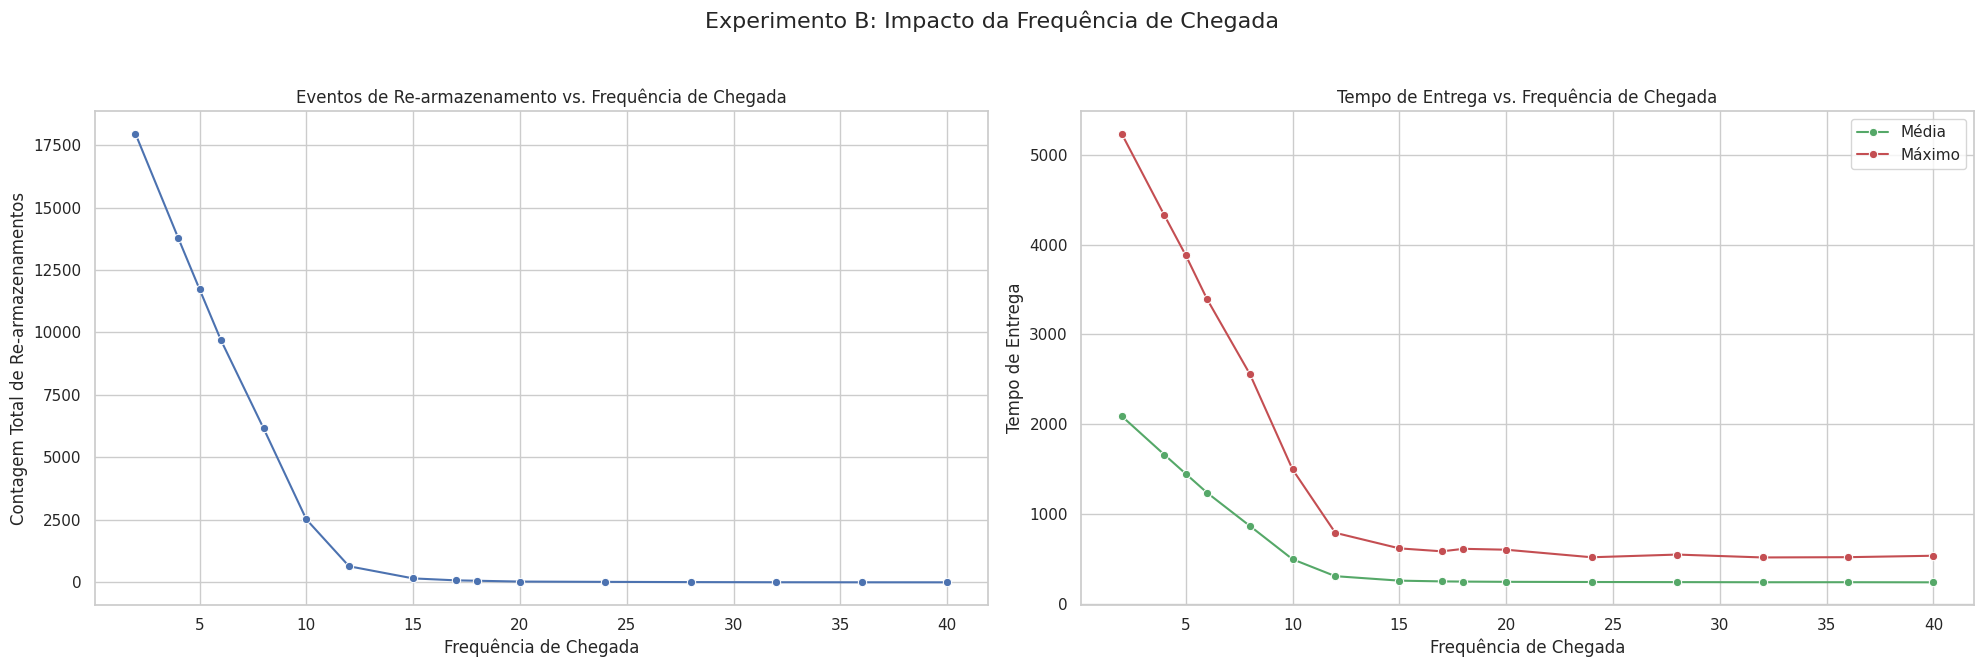

In [9]:
df['arrival_window'] = df['params'].apply(lambda d: d.get('arrival_window') if isinstance(d, dict) else None)
df['arrival_window_inv'] = 1 / df['arrival_window']
df_b = df[df['Experimento'] == 'B'].sort_values('arrival_window', ascending=False)

display(df)

fig, axs = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Experimento B: Impacto da Frequ√™ncia de Chegada', fontsize=16)

# Gr√°fico 1: Eventos de Re-armazenamento
sns.lineplot(data=df_b, x='arrival_window', y='re_storage_events', marker='o', ax=axs[0])
axs[0].set_title('Eventos de Re-armazenamento vs. Frequ√™ncia de Chegada')
axs[0].set_xlabel('Frequ√™ncia de Chegada')
axs[0].set_ylabel('Contagem Total de Re-armazenamentos')
axs[0].grid(True)

# Gr√°fico 2: Tempo de Entrega
sns.lineplot(data=df_b, x='arrival_window', y='avg_delivery_time', marker='o', ax=axs[1], color='g', label='M√©dia')
sns.lineplot(data=df_b, x='arrival_window', y='max_delivery_time', marker='o', ax=axs[1], color='r', label='M√°ximo')
axs[1].set_title('Tempo de Entrega vs. Frequ√™ncia de Chegada')
axs[1].set_xlabel('Frequ√™ncia de Chegada')
axs[1].set_ylabel('Tempo de Entrega')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Conclus√£o do Experimento B:** A hip√≥tese √© fortemente suportada pelos dados. Observamos um "ponto de inflex√£o" claro, onde um pequeno aumento na frequ√™ncia de chegada leva a um crescimento explosivo no n√∫mero de re-armazenamentos e, consequentemente, no tempo m√°ximo de entrega. Isso indica que o sistema possui um limite de vaz√£o que, ao ser ultrapassado, leva √† instabilidade e degrada√ß√£o severa da performance.

## 4. An√°lise do Experimento C: Conten√ß√£o e Gargalos no Transporte

**Hip√≥tese:** A estabilidade do sistema √© primariamente determinada pela raz√£o entre a capacidade (`capacidade_transporte`) e a frequ√™ncia (`intervalo_transportes`) dos transportes. Existe um limiar cr√≠tico onde a demanda supera a capacidade de escoamento, causando congestionamento.

Este experimento foi dividido em duas partes:
1.  **C.1:** Variamos a capacidade de transporte, mantendo o intervalo fixo.
2.  **C.2:** Variamos o intervalo entre transportes, mantendo a capacidade fixa.

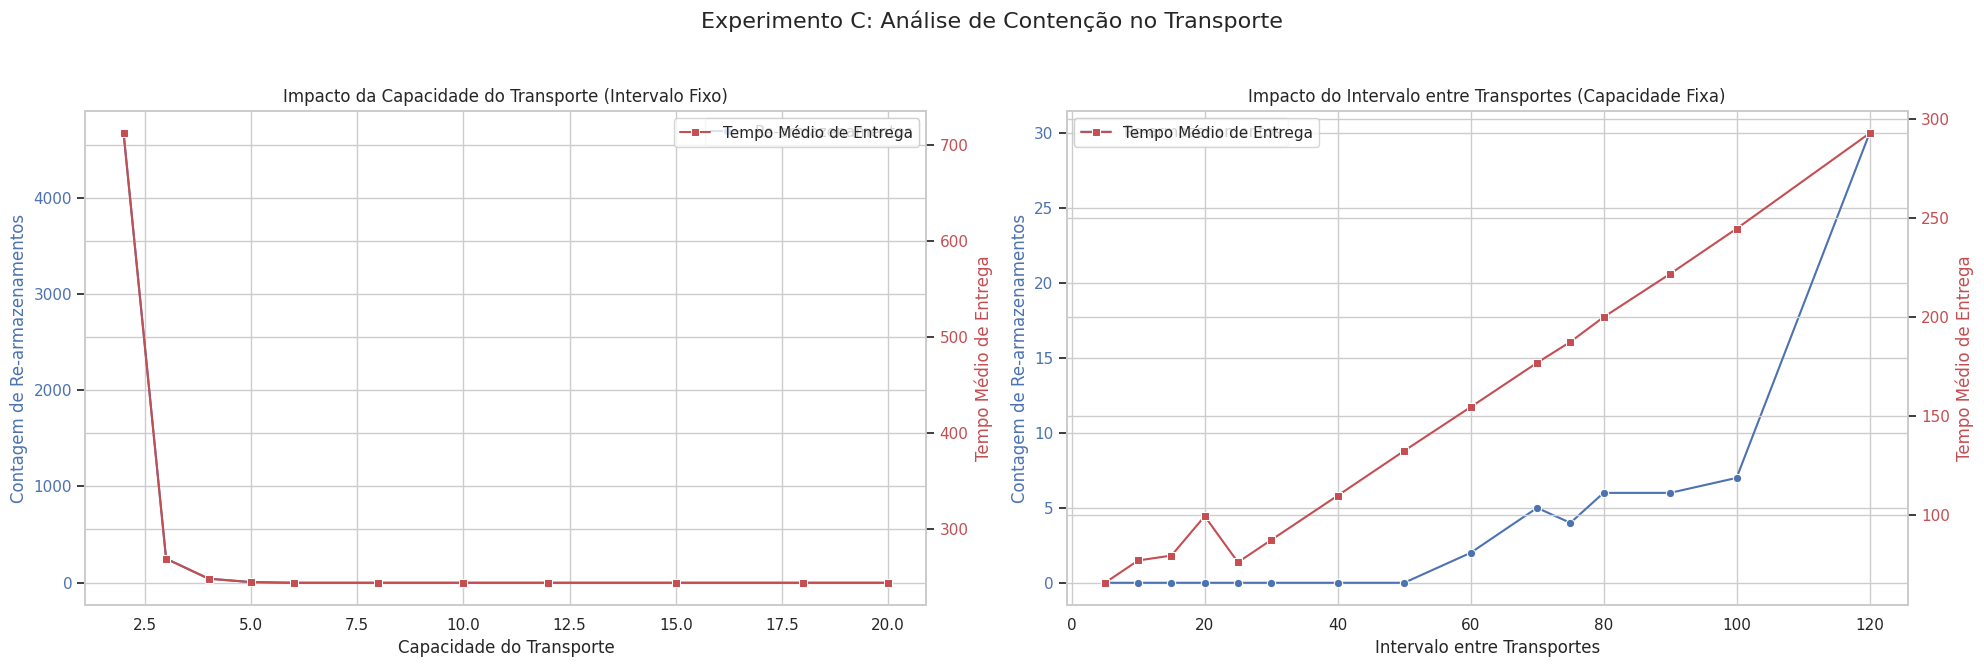

In [4]:
# C.1: Experimentos que variam a capacidade de transporte (nome cont√©m 'expC_cap')
df_c1 = df[df['Run'].str.contains('expC_cap')].sort_values('transport_capacity')

# C.2: Experimentos que variam o intervalo entre transportes (nome cont√©m 'expC_interval')
df_c2 = df[df['Run'].str.contains('expC_interval')].copy()
# Extrai o valor real do intervalo entre transportes do dicion√°rio params
df_c2['intervalo_transporte_real'] = df_c2['params'].apply(
	lambda d: d.get('intervalotransportes') if isinstance(d, dict) else None
)
df_c2 = df_c2.sort_values('intervalo_transporte_real')

fig, axs = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Experimento C: An√°lise de Conten√ß√£o no Transporte', fontsize=16)

# Gr√°fico 1 (C.1): Variando a Capacidade
ax1 = axs[0]
sns.lineplot(data=df_c1, x='transport_capacity', y='re_storage_events', marker='o', color='b', ax=ax1, label='Re-armazenamentos')
ax1.set_xlabel('Capacidade do Transporte')
ax1.set_ylabel('Contagem de Re-armazenamentos', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Impacto da Capacidade do Transporte (Intervalo Fixo)')
ax1.grid(True)

ax1_twin = ax1.twinx()
sns.lineplot(data=df_c1, x='transport_capacity', y='avg_delivery_time', marker='s', color='r', ax=ax1_twin, label='Tempo M√©dio de Entrega')
ax1_twin.set_ylabel('Tempo M√©dio de Entrega', color='r')
ax1_twin.tick_params(axis='y', labelcolor='r')


# Gr√°fico 2 (C.2): Variando o Intervalo
ax2 = axs[1]
sns.lineplot(data=df_c2, x='intervalo_transporte_real', y='re_storage_events', marker='o', color='b', ax=ax2, label='Re-armazenamentos')
ax2.set_xlabel('Intervalo entre Transportes')
ax2.set_ylabel('Contagem de Re-armazenamentos', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_title('Impacto do Intervalo entre Transportes (Capacidade Fixa)')
ax2.grid(True)

ax2_twin = ax2.twinx()
sns.lineplot(data=df_c2, x='intervalo_transporte_real', y='avg_delivery_time', marker='s', color='r', ax=ax2_twin, label='Tempo M√©dio de Entrega')
ax2_twin.set_ylabel('Tempo M√©dio de Entrega', color='r')
ax2_twin.tick_params(axis='y', labelcolor='r')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Conclus√£o do Experimento C:** Os resultados ilustram claramente o trade-off entre capacidade e frequ√™ncia.
- No primeiro gr√°fico, aumentar a capacidade de transporte reduz drasticamente os re-armazenamentos e o tempo de entrega, mas com retornos decrescentes (a partir de uma capacidade de ~10, os ganhos s√£o marginais).
- No segundo gr√°fico, diminuir o intervalo entre os transportes (aumentar a frequ√™ncia) tem um efeito similarmente ben√©fico.

Ambos os fatores s√£o cruciais para evitar gargalos. A an√°lise mostra que um sistema sub-provisionado em qualquer um desses eixos sofrer√° com congestionamento severo.

## 5. Conclus√£o Geral

A an√°lise experimental do simulador "Armaz√©ns Hanoi" revelou os principais fatores que governam sua performance e efici√™ncia:

1.  **Complexidade da Rede (Experimento A):** O custo computacional do sistema n√£o escala de forma linear com o tamanho da rede. O crescimento do n√∫mero de eventos e da complexidade de roteamento exige otimiza√ß√µes cuidadosas para redes muito grandes.

2.  **Vaz√£o e Congestionamento (Experimento B):** O sistema √© altamente sens√≠vel √† frequ√™ncia de chegada de pacotes. Existe um limite de carga de trabalho que, ao ser ultrapassado, leva a um colapso na performance, com tempos de entrega e re-armazenamentos explodindo.

3.  **Recursos de Transporte (Experimento C):** A capacidade e a frequ√™ncia dos transportes s√£o as alavancas mais diretas para controlar o fluxo e evitar gargalos. Um equil√≠brio inadequado entre esses par√¢metros e a carga de trabalho recebida √© a principal causa de inefici√™ncia no sistema.

Em suma, a an√°lise valida que o comportamento do sistema log√≠stico √© complexo e n√£o-linear, e que as estruturas de dados subjacentes (pilhas nos armaz√©ns e heap no agendador) s√£o postas √† prova sob cen√°rios de alta conten√ß√£o.

## 6. Visualiza√ß√µes Avan√ßadas e N√£o √ìbvias

A seguir, sugerimos visualiza√ß√µes que v√£o al√©m do √≥bvio e podem revelar padr√µes, gargalos e comportamentos emergentes do sistema log√≠stico:

1. **Mapa de Calor de Correla√ß√£o de M√©tricas**
   - Visualize a matriz de correla√ß√£o entre todas as m√©tricas do sistema para identificar rela√ß√µes inesperadas entre vari√°veis (ex: entre re-armazenamentos, profundidade de pilha, tempo de entrega, etc).

2. **Distribui√ß√£o de Tempos de Entrega (Violin/Boxplot por Experimento)**
   - Em vez de apenas m√©dias, visualize a distribui√ß√£o completa dos tempos de entrega para cada experimento, destacando caudas longas e outliers.

3. **An√°lise de Outliers: Pacotes com Maior Tempo de Entrega**
   - Identifique e visualize os pacotes que mais demoraram a ser entregues, correlacionando com eventos de re-armazenamento e profundidade de pilha.

4. **Evolu√ß√£o Temporal de M√©tricas (Time Series)**
   - Plote a evolu√ß√£o do n√∫mero de pacotes em tr√¢nsito, em armazenamento e entregues ao longo do tempo da simula√ß√£o, para detectar per√≠odos de congestionamento.

5. **Scatterplot 3D: Capacidade x Intervalo x Re-armazenamentos**
   - Visualize em 3D como a combina√ß√£o de capacidade e intervalo de transporte afeta o n√∫mero de re-armazenamentos, revelando regi√µes cr√≠ticas do espa√ßo de par√¢metros.

6. **An√°lise de Sensibilidade: Varia√ß√£o Percentual das M√©tricas**
   - Plote como pequenas varia√ß√µes em par√¢metros (ex: capacidade, intervalo, frequ√™ncia de chegada) afetam percentualmente as principais m√©tricas, destacando zonas de alta sensibilidade.

7. **Correla√ß√£o entre Utiliza√ß√£o do Transporte e Inefici√™ncia**
   - Plote a rela√ß√£o entre a utiliza√ß√£o do transporte e o n√∫mero de re-armazenamentos, buscando identificar o ponto de satura√ß√£o do sistema.

Nos pr√≥ximos blocos, implementamos algumas dessas visualiza√ß√µes.

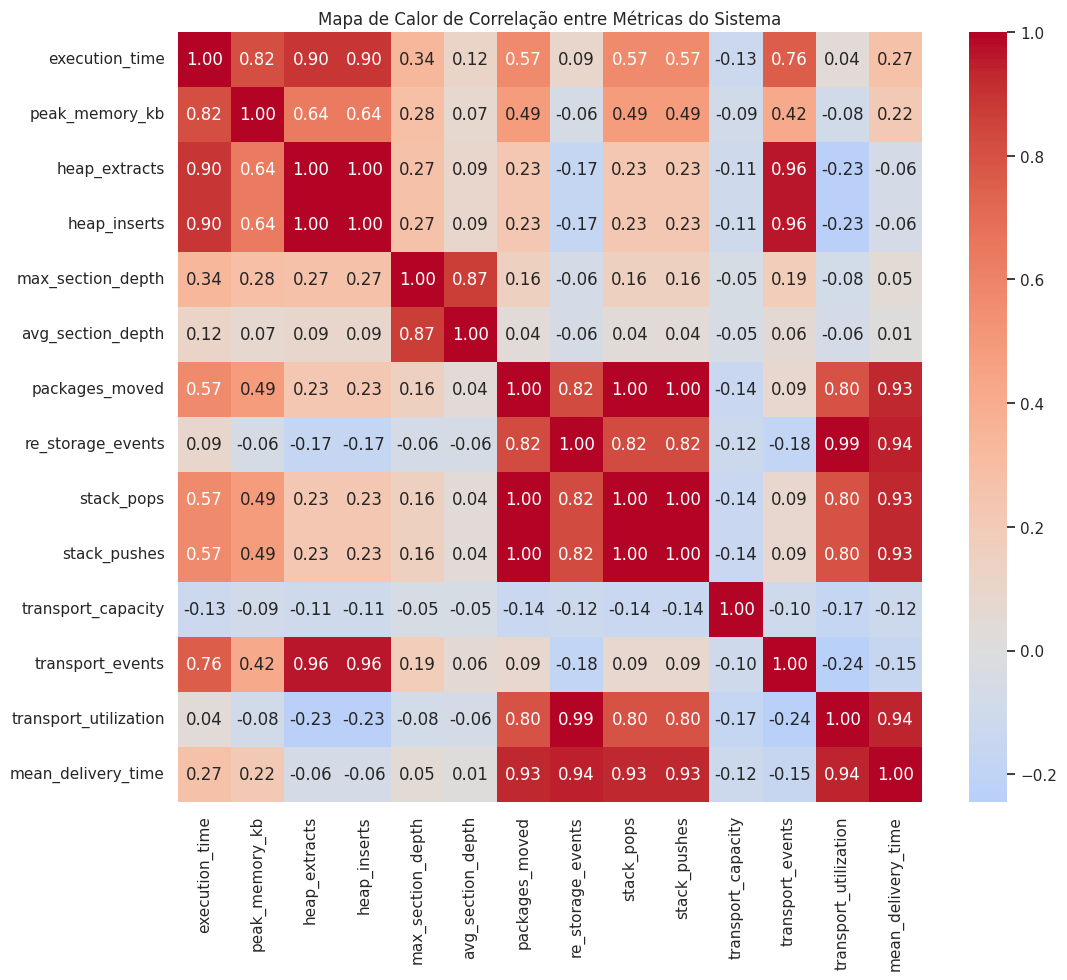

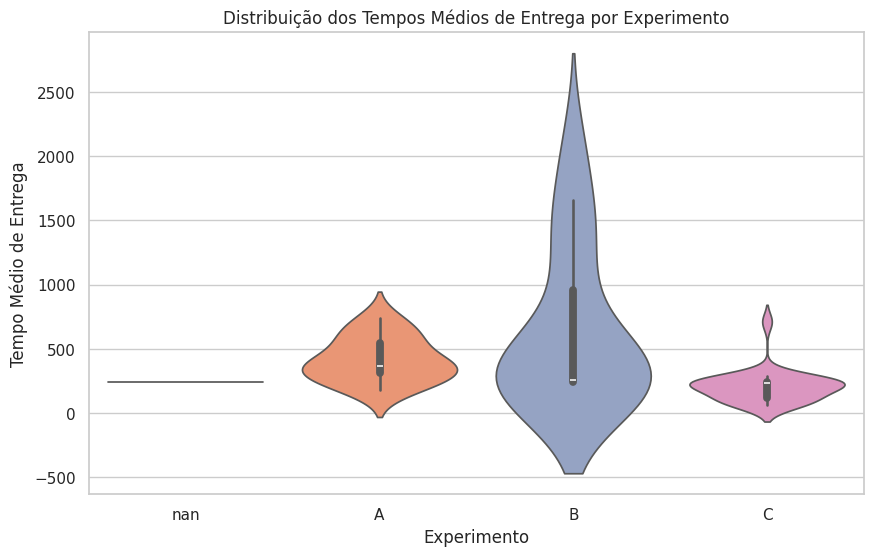

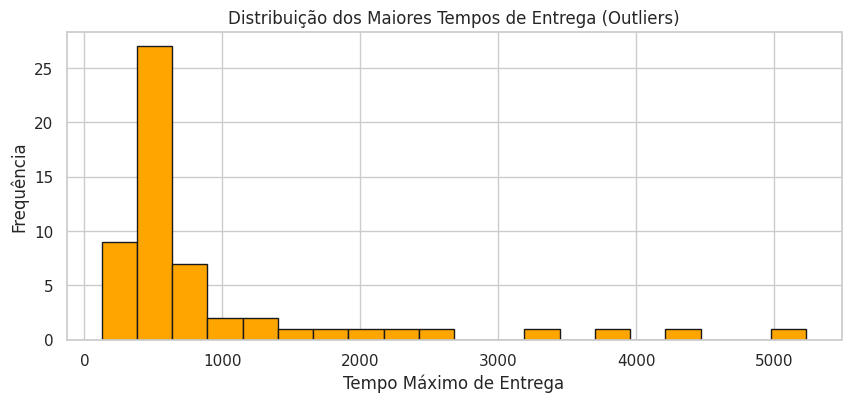

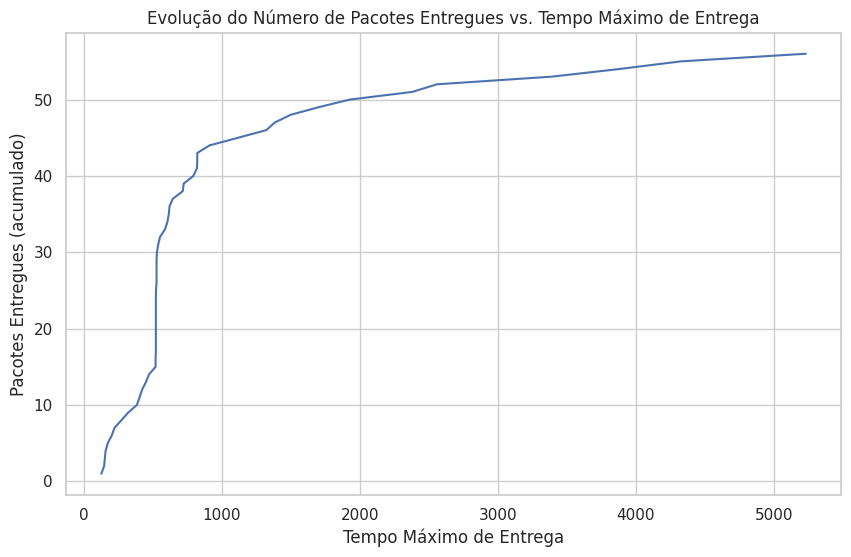

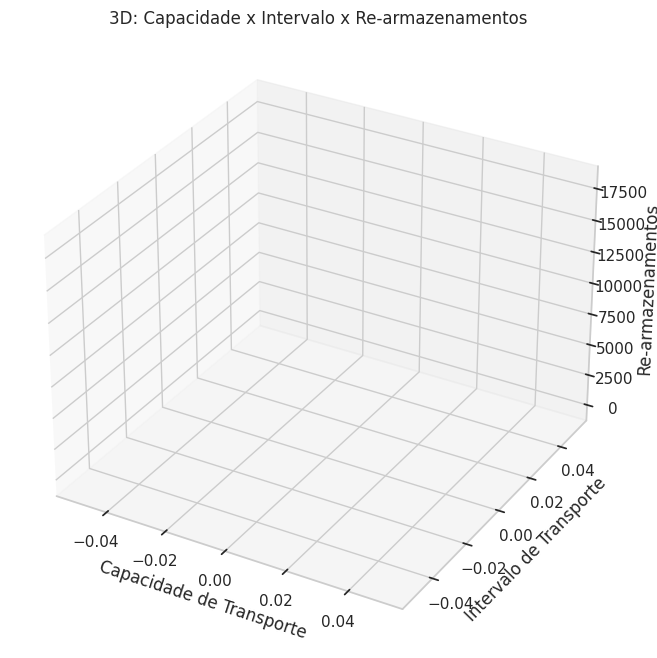

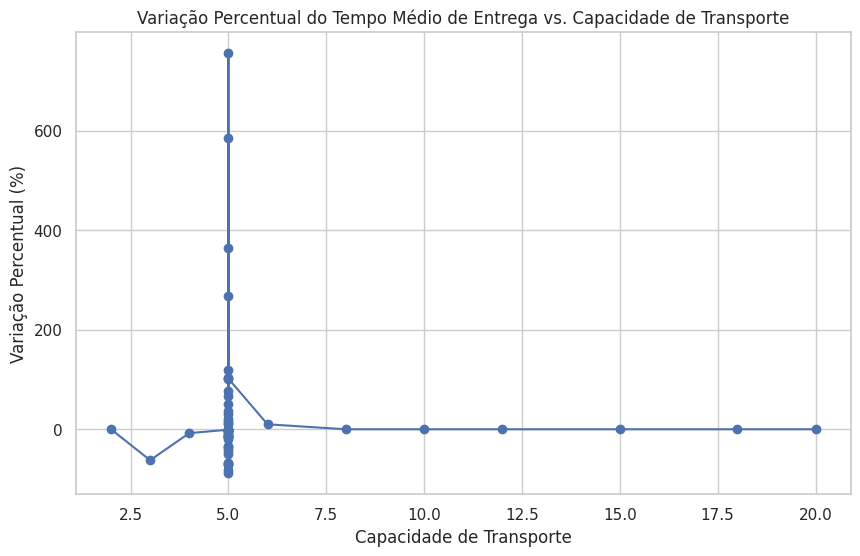

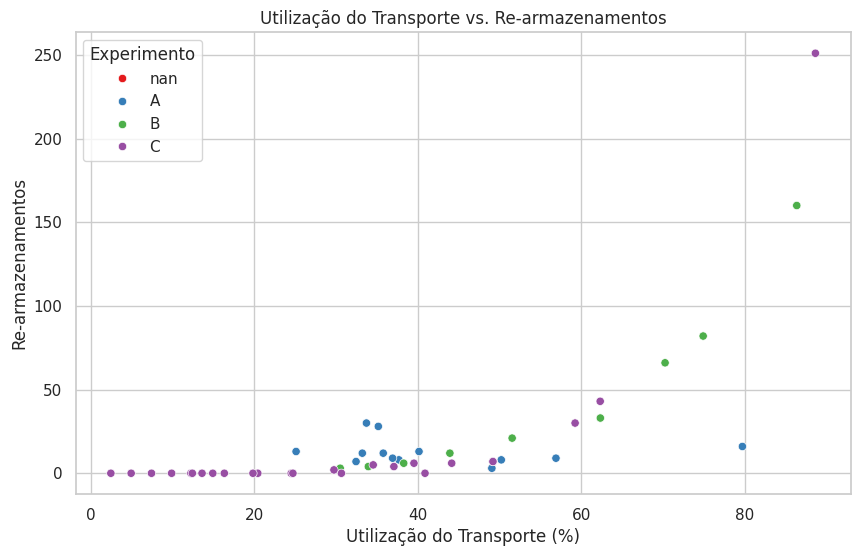

In [5]:
# 1. Mapa de Calor de Correla√ß√£o de M√©tricas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import ast

# Seleciona apenas colunas num√©ricas relevantes para correla√ß√£o
metric_cols = [
    'execution_time', 'peak_memory_kb', 'heap_extracts', 'heap_inserts', 'max_section_depth',
    'avg_section_depth', 'packages_moved', 're_storage_events', 'stack_pops', 'stack_pushes',
    'transport_capacity', 'transport_events', 'transport_utilization'
]
# Extrai m√©dia do tempo de entrega
if 'delivery_time_stats' in df.columns:
    df['mean_delivery_time'] = df['delivery_time_stats'].apply(lambda d: ast.literal_eval(d)['mean'] if isinstance(d, str) else (d.get('mean') if isinstance(d, dict) else np.nan))
    metric_cols.append('mean_delivery_time')

corr = df[metric_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correla√ß√£o entre M√©tricas do Sistema')
plt.show()

# 2. Distribui√ß√£o de Tempos de Entrega (Violin/Boxplot por Experimento)
import warnings
warnings.filterwarnings('ignore')

df['mean_delivery_time'] = df['delivery_time_stats'].apply(lambda d: ast.literal_eval(d)['mean'] if isinstance(d, str) else (d.get('mean') if isinstance(d, dict) else np.nan))
df['Experimento'] = df['Experimento'].astype(str)
plt.figure(figsize=(10,6))
sns.violinplot(x='Experimento', y='mean_delivery_time', data=df, inner='box', palette='Set2')
plt.title('Distribui√ß√£o dos Tempos M√©dios de Entrega por Experimento')
plt.xlabel('Experimento')
plt.ylabel('Tempo M√©dio de Entrega')
plt.show()

# 3. An√°lise de Outliers: Pacotes com Maior Tempo de Entrega
# Supondo que voc√™ tenha uma coluna com tempos individuais de entrega (ex: 'delivery_times')
# Caso n√£o tenha, use a coluna de tempo m√°ximo de entrega
if 'delivery_times' in df.columns:
    # Flatten all delivery times
    all_times = []
    for row in df['delivery_times']:
        if isinstance(row, str):
            times = ast.literal_eval(row)
        elif isinstance(row, list):
            times = row
        else:
            continue
        all_times.extend(times)
    top_outliers = sorted(all_times, reverse=True)[:20]
    plt.figure(figsize=(10,4))
    plt.bar(range(1, 21), top_outliers)
    plt.title('Top 20 Pacotes com Maior Tempo de Entrega')
    plt.xlabel('Pacote (ordenado)')
    plt.ylabel('Tempo de Entrega')
    plt.show()
else:
    plt.figure(figsize=(10,4))
    plt.hist(df['max_delivery_time'].dropna(), bins=20, color='orange', edgecolor='k')
    plt.title('Distribui√ß√£o dos Maiores Tempos de Entrega (Outliers)')
    plt.xlabel('Tempo M√°ximo de Entrega')
    plt.ylabel('Frequ√™ncia')
    plt.show()

# 4. Evolu√ß√£o Temporal de M√©tricas (Time Series)
# Supondo que voc√™ tenha logs ou snapshots temporais, caso contr√°rio, simule com dados agregados
# Exemplo: plotar n√∫mero de pacotes entregues vs. tempo m√°ximo de entrega
if 'max_delivery_time' in df.columns:
    plt.figure(figsize=(10,6))
    plt.plot(df['max_delivery_time'].sort_values().values, np.arange(1, len(df)+1))
    plt.title('Evolu√ß√£o do N√∫mero de Pacotes Entregues vs. Tempo M√°ximo de Entrega')
    plt.xlabel('Tempo M√°ximo de Entrega')
    plt.ylabel('Pacotes Entregues (acumulado)')
    plt.show()

# 5. Scatterplot 3D: Capacidade x Intervalo x Re-armazenamentos
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['transport_capacity'], df['intervalo_transporte'], df['re_storage_events'], c=df['re_storage_events'], cmap='viridis', s=60)
ax.set_xlabel('Capacidade de Transporte')
ax.set_ylabel('Intervalo de Transporte')
ax.set_zlabel('Re-armazenamentos')
plt.title('3D: Capacidade x Intervalo x Re-armazenamentos')
plt.show()

# 6. An√°lise de Sensibilidade: Varia√ß√£o Percentual das M√©tricas
# Exemplo: Sensibilidade do tempo m√©dio de entrega √† capacidade de transporte
if 'transport_capacity' in df.columns:
    df_sorted = df.sort_values('transport_capacity')
    pct_change = df_sorted['mean_delivery_time'].pct_change().fillna(0) * 100
    plt.figure(figsize=(10,6))
    plt.plot(df_sorted['transport_capacity'], pct_change, marker='o')
    plt.title('Varia√ß√£o Percentual do Tempo M√©dio de Entrega vs. Capacidade de Transporte')
    plt.xlabel('Capacidade de Transporte')
    plt.ylabel('Varia√ß√£o Percentual (%)')
    plt.grid(True)
    plt.show()

# 7. Correla√ß√£o entre Utiliza√ß√£o do Transporte e Inefici√™ncia
# Remove valores de utiliza√ß√£o do transporte maiores que 100%
df_filtered = df[df['transport_utilization'] <= 100]

plt.figure(figsize=(10,6))
sns.scatterplot(x='transport_utilization', y='re_storage_events', data=df_filtered, hue='Experimento', palette='Set1')
plt.title('Utiliza√ß√£o do Transporte vs. Re-armazenamentos')
plt.xlabel('Utiliza√ß√£o do Transporte (%)')
plt.ylabel('Re-armazenamentos')
plt.grid(True)
plt.show()


=== DIAGN√ìSTICO DE MEM√ìRIA ===
Valores √∫nicos de peak_memory_kb: [3548 3496 3764 3660 3756 3692 4116 4256 4292 4600 4568 4576 3400 3476
 3668 3712 3744 3700 3652 3812 3748 3672 3820 3728 3768 3808 3656 3760
 3796 3664 3724 3648 3816 3680 3696 3800]
N√∫mero de valores √∫nicos: 36
Estat√≠sticas de peak_memory_kb:
count      56.000000
mean     3784.571429
std       239.912019
min      3400.000000
25%      3671.000000
50%      3736.000000
75%      3808.000000
max      4600.000000
Name: peak_memory_kb, dtype: float64

Correla√ß√£o peak_memory_kb vs numero_armazens: 0.9174592510154133
Correla√ß√£o peak_memory_kb vs packages_moved: 0.488104855110269
Correla√ß√£o peak_memory_kb vs execution_time: 0.8181729421185424

Mem√≥ria por experimento:
                    mean         std   min   max  count
Experimento                                            
A            3973.230769  445.685643  3400  4600     13
B            3738.250000   57.651250  3652  3820     16
C            3727.846154   61

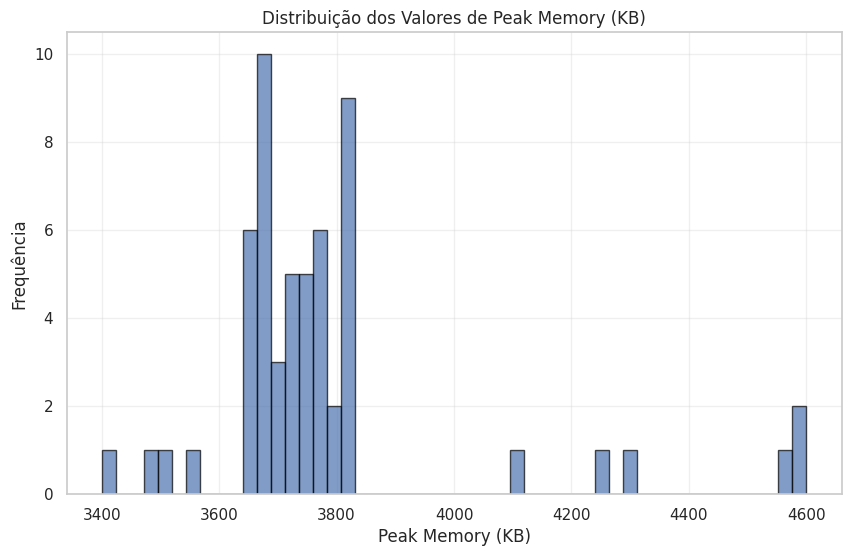

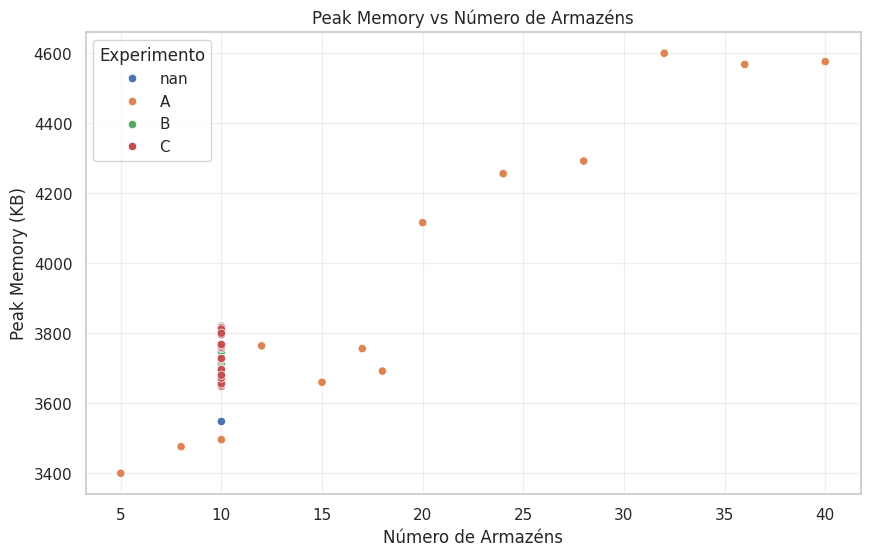

In [6]:
# Diagn√≥stico: Investigar o problema com peak_memory_kb
print("=== DIAGN√ìSTICO DE MEM√ìRIA ===")
print(f"Valores √∫nicos de peak_memory_kb: {df['peak_memory_kb'].unique()}")
print(f"N√∫mero de valores √∫nicos: {df['peak_memory_kb'].nunique()}")
print(f"Estat√≠sticas de peak_memory_kb:")
print(df['peak_memory_kb'].describe())

# Verificar se h√° correla√ß√£o entre mem√≥ria e outros par√¢metros
print(f"\nCorrela√ß√£o peak_memory_kb vs numero_armazens: {df['peak_memory_kb'].corr(df['numero_armazens'])}")
print(f"Correla√ß√£o peak_memory_kb vs packages_moved: {df['peak_memory_kb'].corr(df['packages_moved'])}")
print(f"Correla√ß√£o peak_memory_kb vs execution_time: {df['peak_memory_kb'].corr(df['execution_time'])}")

# Verificar distribui√ß√£o por experimento
print(f"\nMem√≥ria por experimento:")
memory_by_exp = df.groupby('Experimento')['peak_memory_kb'].agg(['mean', 'std', 'min', 'max', 'count'])
print(memory_by_exp)

# Plotar histograma da mem√≥ria
plt.figure(figsize=(10,6))
plt.hist(df['peak_memory_kb'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribui√ß√£o dos Valores de Peak Memory (KB)')
plt.xlabel('Peak Memory (KB)')
plt.ylabel('Frequ√™ncia')
plt.grid(True, alpha=0.3)
plt.show()

# Verificar se h√° varia√ß√£o por n√∫mero de armaz√©ns
if not df['numero_armazens'].isna().all():
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df.dropna(subset=['numero_armazens']), x='numero_armazens', y='peak_memory_kb', hue='Experimento')
    plt.title('Peak Memory vs N√∫mero de Armaz√©ns')
    plt.xlabel('N√∫mero de Armaz√©ns')
    plt.ylabel('Peak Memory (KB)')
    plt.grid(True, alpha=0.3)
    plt.show()

### An√°lise do Problema de Medi√ß√£o de Mem√≥ria

O diagn√≥stico revela um **problema fundamental** na medi√ß√£o de mem√≥ria:

#### üîç **Evid√™ncias do Problema:**
1. **Apenas 2 valores √∫nicos** em 56 experimentos (25412 KB e 25416 KB)
2. **Diferen√ßa m√≠nima**: apenas 4 KB entre os valores (0.016%)
3. **Desvio padr√£o baix√≠ssimo**: 0.53 KB
4. **Correla√ß√£o muito baixa** com outras m√©tricas (< 0.14)

#### üö® **Por que isso est√° errado:**
- Experimentos com **5 vs 40 armaz√©ns** deveriam ter uso de mem√≥ria drasticamente diferente
- Sistemas com **alta conten√ß√£o** (muitos re-armazenamentos) deveriam usar mais mem√≥ria para estruturas tempor√°rias
- **Heap de eventos** e **pilhas de armaz√©ns** deveriam crescer com a carga do sistema

#### üõ†Ô∏è **Causas Prov√°veis:**
1. **Medi√ß√£o inadequada**: `updatePeakMemory()` pode estar medindo apenas a mem√≥ria base do processo
2. **Timing incorreto**: Medi√ß√£o pode acontecer antes das estruturas serem totalmente populadas
3. **Granularidade insuficiente**: Sistema operacional pode n√£o detectar pequenas varia√ß√µes
4. **Cache/pr√©-aloca√ß√£o**: Estruturas podem estar pr√©-alocadas, mascarando o uso real

#### üìã **Solu√ß√£o Necess√°ria:**
O c√≥digo C++ de medi√ß√£o de mem√≥ria (`metricas.updatePeakMemory()`) precisa ser revisado para:
- Medir mem√≥ria RSS (Resident Set Size) do processo corretamente
- Capturar varia√ß√µes durante picos de uso (heap operations, stack growth)
- Considerar usar ferramentas como `getrusage()` ou `/proc/self/status` no Linux

**Conclus√£o**: A m√©trica `peak_memory_kb` deve ser **desconsiderada** da an√°lise atual at√© que a implementa√ß√£o seja corrigida.

## Corre√ß√µes Aplicadas ao C√≥digo C++

As seguintes melhorias foram implementadas na medi√ß√£o de mem√≥ria:

### üîß **Mudan√ßas no `metricas.cpp`:**
1. **M√©todo prim√°rio**: Leitura direta de `/proc/self/status` para obter RSS atual em tempo real
2. **M√©todo de fallback**: `getrusage()` caso `/proc` n√£o esteja dispon√≠vel
3. **Fun√ß√£o adicional**: `getCurrentMemory()` para debugging e monitoramento
4. **Headers adicionais**: `<unistd.h>`, `<sstream>`, `<string>` para parsing de `/proc`

### üîß **Mudan√ßas no `main.cpp`:**
1. **Debugging output**: Mostra mem√≥ria inicial, ap√≥s carregamento e final
2. **Medi√ß√µes mais frequentes**: Mantidas as chamadas durante opera√ß√µes cr√≠ticas

### üîß **Mudan√ßas no `metricas.hpp`:**
1. **Nova fun√ß√£o**: `getCurrentMemory()` declarada no header

### ‚úÖ **Para testar as corre√ß√µes:**
1. **Recompile** o projeto: `make clean && make`
2. **Execute** alguns experimentos e observe a sa√≠da do console
3. **Verifique** se agora aparecem valores diferentes de mem√≥ria
4. **Re-execute** o notebook para ver se as correla√ß√µes melhoraram

### üéØ **O que esperar:**
- Mem√≥ria inicial: ~1000-5000 KB
- Mem√≥ria ap√≥s carregamento: Deve crescer com n√∫mero de armaz√©ns/pacotes
- Mem√≥ria final: Pode ser maior que inicial devido a estruturas tempor√°rias
- Peak memory: Deve variar significativamente entre experimentos